In [1]:
from pso import *
import numpy as np
import time
import seaborn as sns

# Minimizing 30 quadratic functions where each root is between -80 and 80
# The positional arguments must be initialized between -100 and 100
roots = np.random.uniform(-80, 80, 30)


# The sum of 30 quadratic functions, where each function
def exercise_1(position):
    return sum((np.array(position) - roots) ** 2)

import scipy.integrate as integrate
from math import pi, sin

# The quality of a given polynomial approximation to the sin function
def exercise_2(coeffs):
    # make approximation
    approx = lambda x: sum(np.array(coeffs) * (x ** np.array(range(len(coeffs)))))
    # return integral of the absolute value of the difference
    return integrate.quad(lambda x: abs(sin(x) - approx(x)), 
                          -pi/2, pi/2)[0]


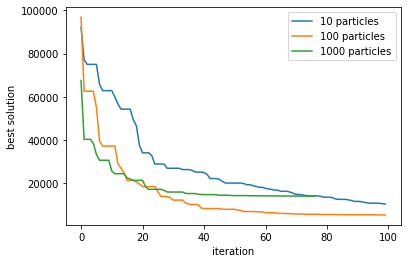

In [2]:
# Study the effect of size of the swarm in the convergence
sizes = [10, 100, 1000]
times = []
for size in sizes:
    start = time.time()
    pso = ParticleSwarm(exercise_1, [(-100, 100)] * 30, size)
    qualities, positions = pso.run(render=True)
    times.append(time.time() - start)
plt.legend([f"{s} particles" for s in sizes], loc='upper right')
plt.ylabel('best solution')
plt.xlabel('iteration')
plt.savefig('swarm_size_quality.png')

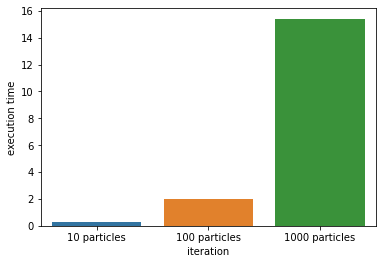

In [3]:
# Execution time on based on 
sns.barplot(x=[f"{s} particles" for s in sizes], y=times)
plt.ylabel('execution time')
plt.xlabel('iteration')
plt.savefig('execution_times.png')

/home/random/pycharm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


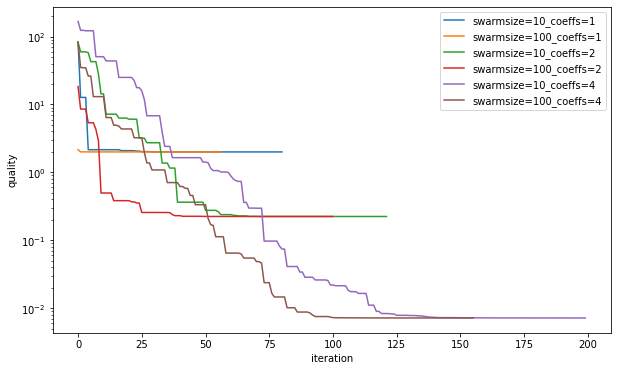

In [4]:
# Study the effect of size of the swarm 
# and of search space complexity
# in the convergence of the algorithm
plt.figure(num=None, figsize=(10, 6))
sizes = [10, 100]
ns = [1, 2, 4]
names = []
for N in ns:
    for size in sizes:
        pso = ParticleSwarm(exercise_2, [(-100, 100)] * N, size)
        qualities, positions = pso.run(render=True,
                                       max_iterations=200,
                                       stopping_rounds=50
                                       )
        names.append(f"swarmsize={size}_coeffs={N}")
plt.legend(names, loc='upper right')
plt.ylabel('quality')
plt.xlabel('iteration')
plt.yscale('log')
plt.savefig('ex2_size_coeffs.png')


In [5]:
d = {'chi': [],
     'phi1': [],
     'phi2': [],
     'quality': [],
     'iterations': []
     }
for chi in [0.1, 0.729, 1.5, 3]:
    for phi1 in [1, 2.05, 4]:
        for phi2 in [1, 2.05, 4]:
            pso = ParticleSwarm(exercise_2, 
                                [(-100, 100)] * 2, 
                                10,
                                chi=chi,
                                phi1=phi1,
                                phi2=phi2,
                                )
            qualities, positions = pso.run(render=False,
                                       max_iterations=100,
                                       stopping_rounds=10
                                       )
            d['chi'].append(chi)
            d['phi1'].append(phi1)
            d['phi2'].append(phi2)
            d['quality'].append(max(qualities))
            d['iterations'].append(len(qualities))
            
df = pd.DataFrame(d)

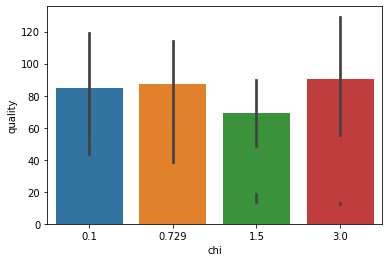

In [18]:
sns.barplot(y='iterations', 
            x='chi', 
            data=df
            )
plt.savefig('chi_iterations.png')
sns.barplot(y='quality', 
            x='chi', 
            data=df
            )

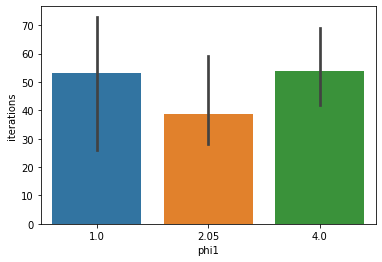

In [17]:
df['phi1_phi2_ratio'] = df['phi1'].values / df['phi2'].values
sns.barplot(y='iterations', 
            x='phi1',
            data=df[df['chi'] == 0.729]
            )

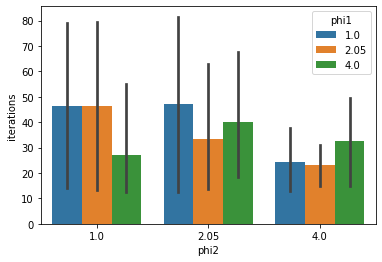

In [24]:

sns.barplot(y='iterations', 
            x='phi2',
            hue='phi1',
            data=df
            )
plt.savefig('phi1_phi2.png')